Accuracy: 0.8533333333333334

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      2711
           1       0.13      0.09      0.11       289

    accuracy                           0.85      3000
   macro avg       0.52      0.51      0.51      3000
weighted avg       0.83      0.85      0.84      3000


Confusion Matrix:
[[2534  177]
 [ 263   26]]


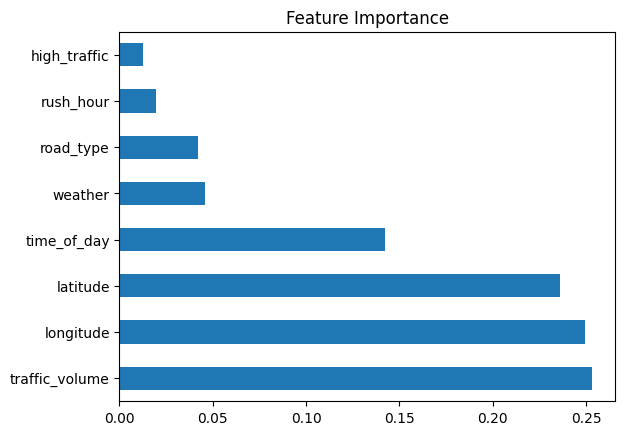


Hotspot Probability: 33.76%


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
n_samples = 10000
data = {
    'latitude': np.random.uniform(40.5, 40.9, n_samples),
    'longitude': np.random.uniform(-74.0, -73.7, n_samples),
    'time_of_day': np.random.randint(0, 24, n_samples),
    'weather': np.random.choice([0, 1, 2], n_samples, p=[0.6, 0.3, 0.1]),  # 0=clear, 1=rain, 2=fog
    'road_type': np.random.choice([0, 1, 2], n_samples, p=[0.7, 0.2, 0.1]),  # 0=highway, 1=urban, 2=rural
    'traffic_volume': np.random.exponential(50, n_samples),
    'accident_occurred': np.random.choice([0, 1], n_samples, p=[0.9, 0.1])
}

df = pd.DataFrame(data)

df['high_traffic'] = np.where(df['traffic_volume'] > 100, 1, 0)
df['rush_hour'] = np.where((df['time_of_day'] >= 7) & (df['time_of_day'] <= 10) | 
                          (df['time_of_day'] >= 16) & (df['time_of_day'] <= 19), 1, 0)

X = df.drop('accident_occurred', axis=1)
y = df['accident_occurred']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    class_weight='balanced',  # Handles class imbalance
    random_state=42
)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title('Feature Importance')
plt.show()

def predict_hotspot(lat, lon, time, weather, road_type, traffic):
    input_data = pd.DataFrame([[lat, lon, time, weather, road_type, traffic, 0, 0]],
                              columns=X.columns)
    proba = rf_model.predict_proba(input_data)[0][1]
    return proba

hotspot_prob = predict_hotspot(12.97, 77.59, 18, 1, 1, 150)
print(f"\nHotspot Probability: {hotspot_prob:.2%}")

In [3]:
import joblib
joblib.dump(rf_model, 'accpred.pkl')

['accpred.pkl']